## EXPLORATORY DATA ANALYSIS ##

KEY STEPS:

1. Testing relationships between variables (correlation, covariation)

2. Testing variation between variables (ANOVA) (Between continuous and categorical variables)

3. Feature reduction (Determining the variables key for inference/predictions)

In [23]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [24]:
#Load dataset
# Reading the dataset
import pandas as pd
import numpy as np
data=pd.read_csv("Female_Mps.csv")

# Removing duplicate rows if any
data_new=data.drop_duplicates()
print('Shape After deleting duplicate values:', data_new.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
data_new.head(10)


Shape After deleting duplicate values: (184, 78)


,country,1945,1946,1947,1948,1949,1950,1951,1952,1953,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.4,27.4,27.4,27.4,27.7,27.8,27.9,27.2,27.2,27.2
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.1,33.5,32.8,32.2,31.6,30.9,30.4,30.0,29.6,29.6
2,Albania,3.66,6.46,8.81,10.80,12.50,14.10,13.50,12.90,12.40,...,15.9,15.7,18.8,21.8,24.8,27.9,28.6,29.5,29.5,35.7
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.0,47.6,44.3,39.3,41.1,42.9,44.6,46.4,46.4,46.4
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.5,19.2,20.8,22.5,29.4,36.3,43.1,50.0,50.0,50.0
5,Argentina,NaN,0.00,0.00,0.00,5.99,11.40,16.20,17.50,18.80,...,37.7,37.7,37.4,37.1,38.0,38.9,39.4,39.9,42.0,44.4
6,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.7,11.8,12.9,14.2,15.6,17.1,24.2,23.5,22.7,34.6
7,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.5,20.8,21.2,23.9,26.5,29.0,31.4,31.4,31.4,31.4
8,Australia,NaN,3.60,3.21,2.94,2.73,2.46,2.19,3.29,6.67,...,31.4,32.2,31.2,30.3,29.5,31.1,33.4,36.6,37.9,38.5
9,Austria,4.21,0.00,0.00,0.00,4.23,2.08,2.08,2.08,4.76,...,29.0,30.5,29.0,29.0,29.5,33.1,35.8,38.5,40.6,41.4


Visual exploration of relationship between variables

Continuous Vs Continuous ---- Scatter Plot

Categorical Vs Continuous---- Box Plot

Categorical Vs Categorical---- Grouped Bar Plots

Statistical measurement of relationship strength between variables

Continuous Vs Continuous ---- Correlation matrix

Categorical Vs Continuous---- ANOVA test

Categorical Vs Categorical--- Chi-Square test

**1. Testing relationships between continuous variables**

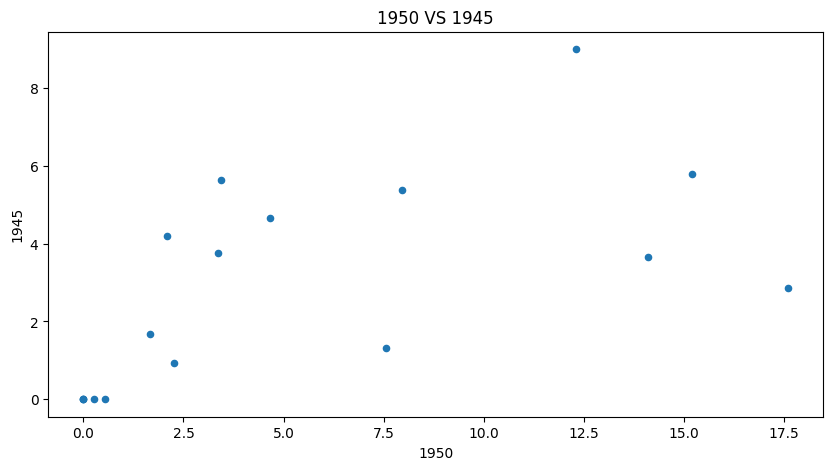

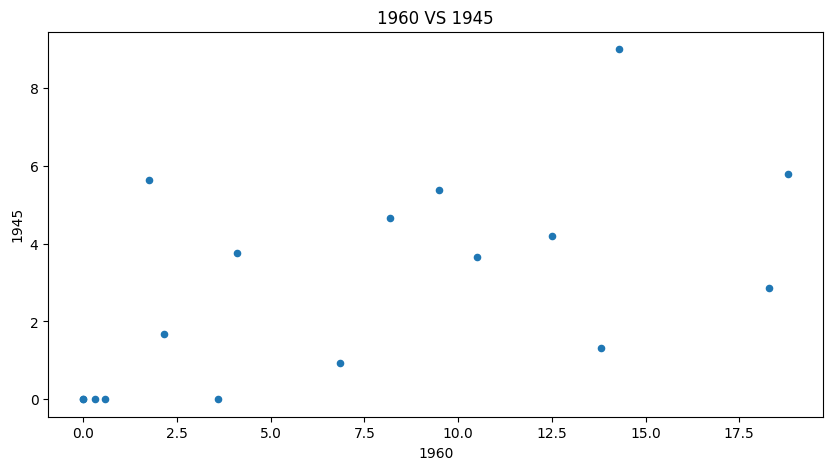

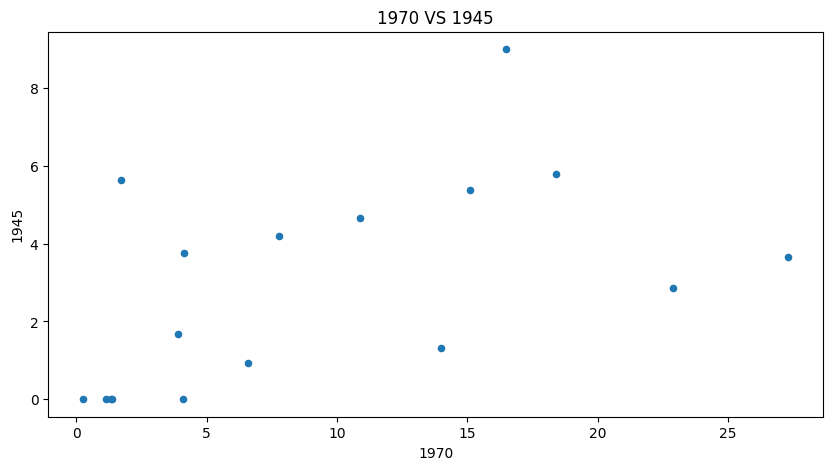

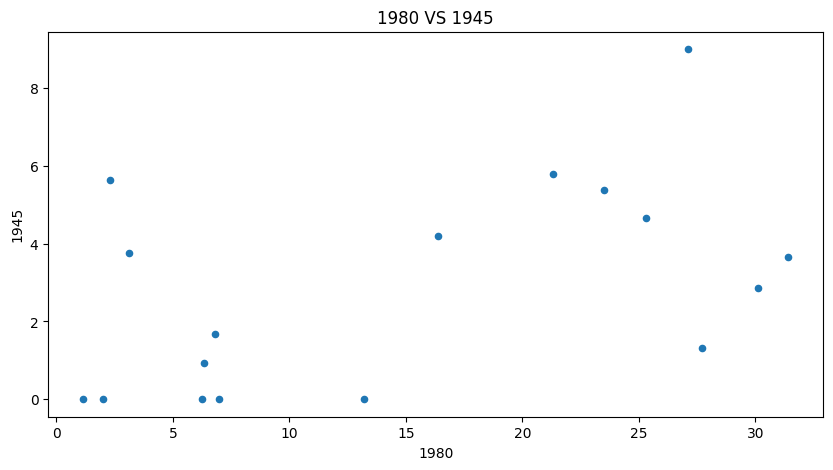

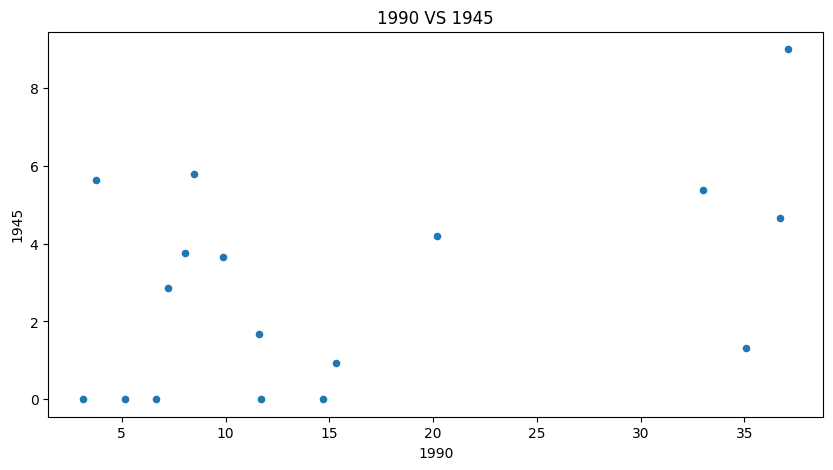

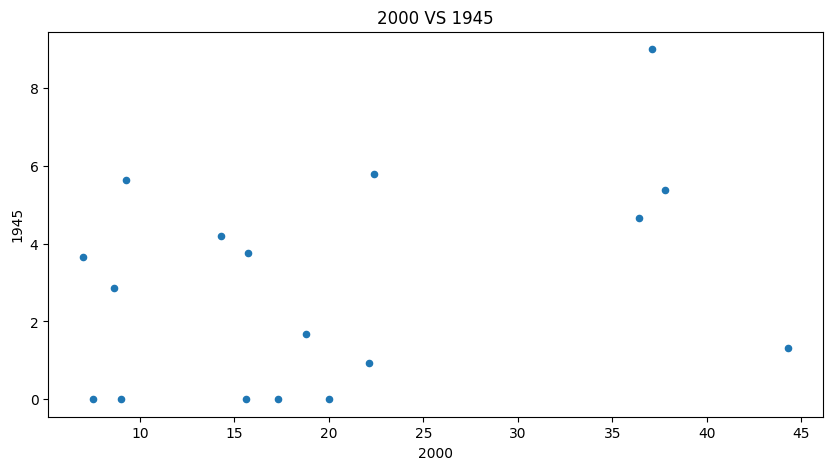

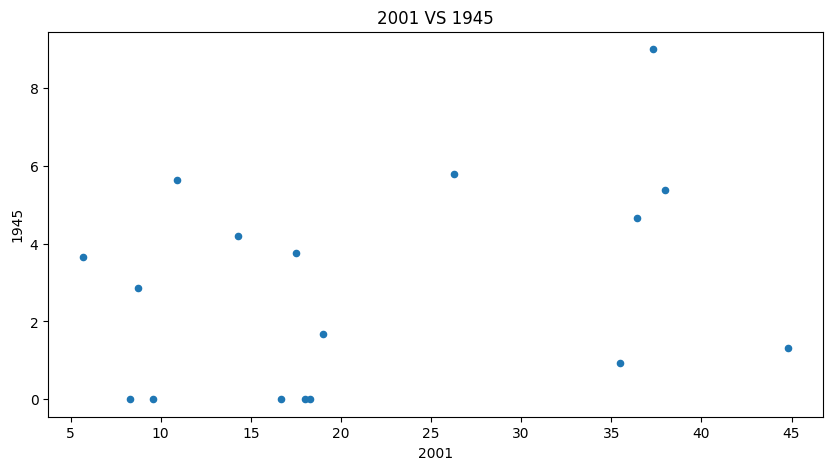

In [5]:
#Visual display of scatterplot between "1945" and "2001" in the Mps dataset
#Plotting scatterplot for each 1945 vs 2001, 2000 etc
#Therefore the target variable is "1945"

ContinuousCols=['1950','1960', '1970', '1980', '1990','2000','2001']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='1945', figsize=(10,5), title=predictor+" VS "+ '1945')

It is tough to note any distinctive trends in the relationship between observations in "1945" versus other years.

So best to run a statistical relationship using correlation

In [8]:
#Correlation matrix between variables "1945" and other years
# Calculating correlation matrix
ContinuousVariables=['1950','1960', '1970', '1980', '1990','2000','2001','1945']

# Creating the correlation matrix
CorrelationData=data[ContinuousVariables].corr()
CorrelationData

,1950,1960,1970,1980,1990,2000,2001,1945
1950,1.000000,0.799940,0.774328,0.700973,0.253048,0.280735,0.279969,0.604084
1960,0.799940,1.000000,0.820912,0.758859,0.375568,0.302939,0.293251,0.589337
1970,0.774328,0.820912,1.000000,0.833271,0.456222,0.316825,0.294313,0.524603
1980,0.700973,0.758859,0.833271,1.000000,0.675122,0.500092,0.458322,0.501072
1990,0.253048,0.375568,0.456222,0.675122,1.000000,0.754524,0.725200,0.453528
2000,0.280735,0.302939,0.316825,0.500092,0.754524,1.000000,0.975265,0.358507
2001,0.279969,0.293251,0.294313,0.458322,0.725200,0.975265,1.000000,0.317510
1945,0.604084,0.589337,0.524603,0.501072,0.453528,0.358507,0.317510,1.000000


<AxesSubplot: >

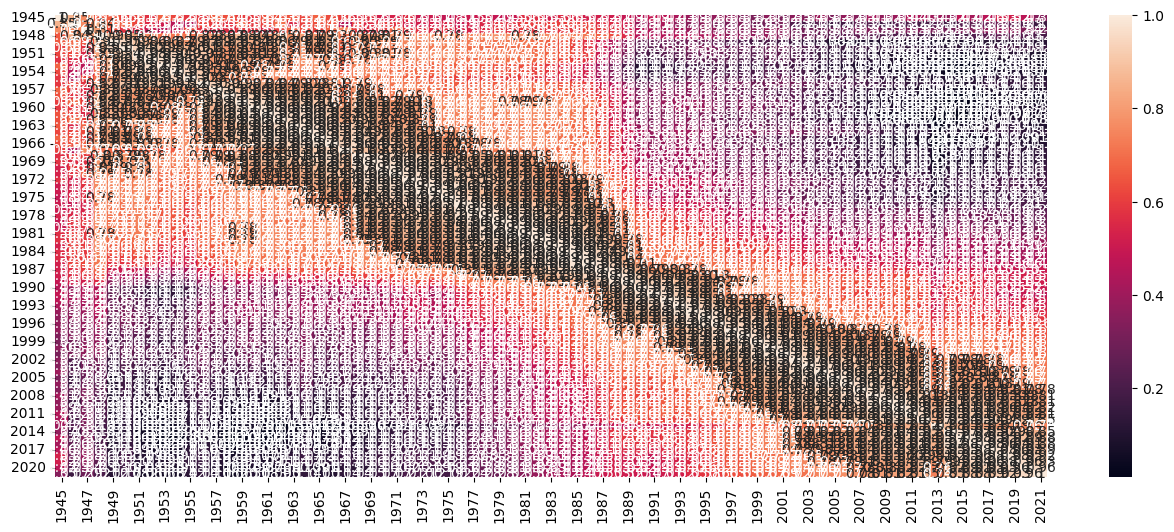

In [13]:
#The correlation matrix can also be generated as a heat matrix
#Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(), annot=True)

Correlation values range from -1 to +1 indicating very strong negative or positive correlation.

Features/variables with strong correlation between them get selected for feature engineering in inference analyses

In [14]:
# Filtering only those columns where absolute correlation > 0.5 with the Target Variable "1945"
CorrelationData['1945'][abs(CorrelationData['1945']) > 0.5 ]

1950    0.604084
1960    0.589337
1970    0.524603
1980    0.501072
1945    1.000000
Name: 1945, dtype: float64

Note that correlation generates an "r" value

r ranges from 0-1.0 or 0 to -1.0

r = 0.0-0.3 is low correlation

r= 0.4-0.6 is moderate correlation

r=0.7-1.0 is high correlation

**2. Testing relationships between continuous and categorical variables**

In [25]:
# Load the Diamonds dataset
# Reading the dataset
import pandas as pd
import numpy as np
Diamonds=pd.read_excel("DiamondPricesData.xlsx")

# Print sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Diamonds.head(10)

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
5,336,0.24,Very Good,J,VVS2,NaN,57.0,3.94,3.96,2.48
6,336,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
7,337,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53
8,337,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49
9,338,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39


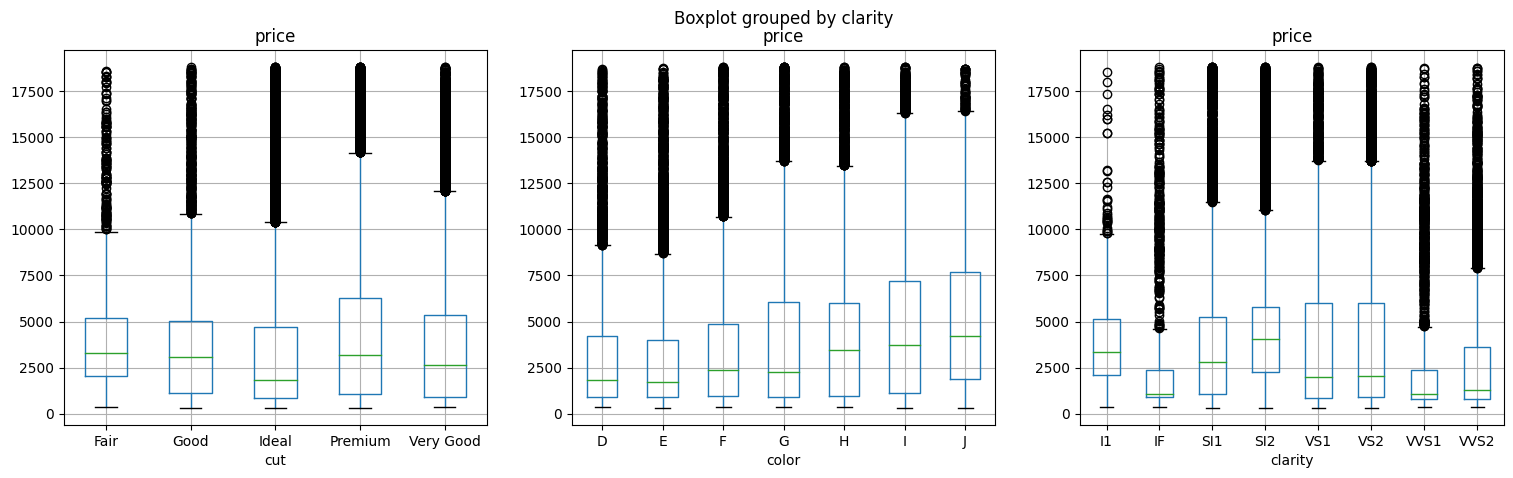

In [16]:
#Use a boxplot to display relationship between the continuous and categorical variable
# Box plots for Categorical Target Variable "price" and continuous predictors
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    Diamonds.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

<AxesSubplot: title={'center': 'price'}, xlabel='color'>

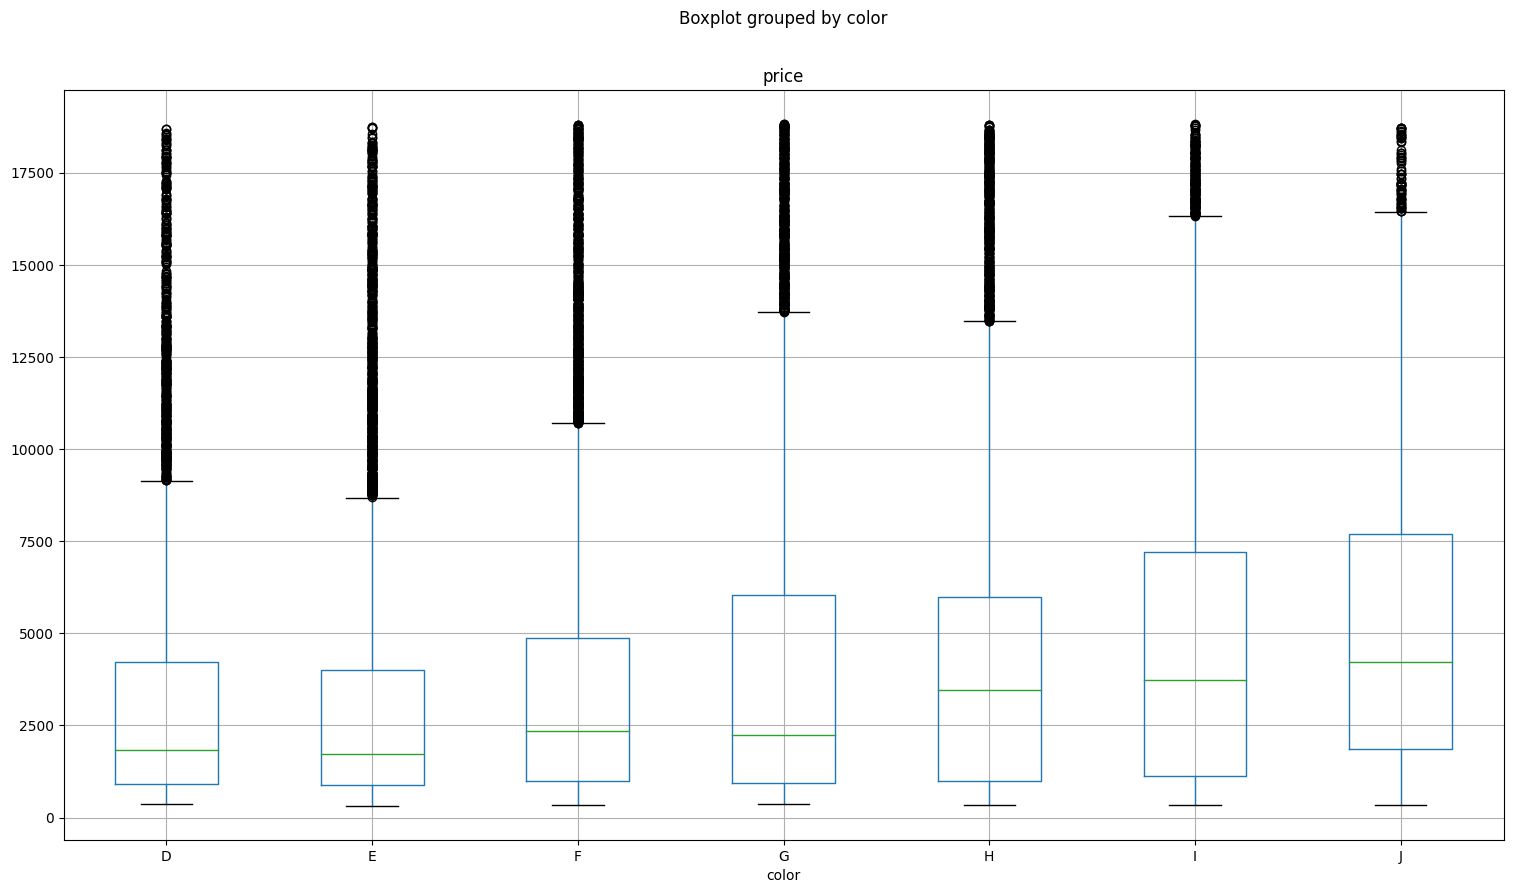

In [18]:
# Or generate a boxplot between "price" and "color"
Diamonds.boxplot(column='price', by='color', figsize=(18,10))

The graphical trends aren't too clear, so use statistical approaches

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)

ANOVA Test result: Probability of H0 being true

In [19]:
#ANOVA tests:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)


In [20]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['color']
FunctionAnova(inpData=Diamonds, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

color is correlated with price | P-Value: 0.0


['color']

In [21]:
#Or use the function to check all the categorical variables for their correlations with price
CategoricalPredictorList=['color', 'clarity', 'cut']
FunctionAnova(inpData=Diamonds, 
              TargetVariable='price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.9190895e-316
cut is correlated with price | P-Value: 8.42830730759452e-150


['color', 'clarity', 'cut']

Based on ANOVA, all categorical variables are statistically correlated with price.

**3. Testing relationships between categorical and categorical variables**

In [55]:
#Using the survey data "Dec11.sav"
#First import the dataset
#Then use the pyreadstat library to import the spss file
import pyreadstat
Survey, meta = pyreadstat.read_sav("Dec11.sav")
Survey.head()

,psraid,int_date,lang,sample,segment,strata,version,state,cregion,density,...,ideo3x,iphoneuse,hphoneuse,adults,recadults,age1834,wt1,pupsa,wt2,weight
0,100017.0,120611.0,1.0,1.0,1.0,8.0,1.0,48.0,3.0,4.0,...,1.0,2.0,2.0,2.0,2.0,2.0,0.575831,0.774818,0.446164,2.65
1,100023.0,120611.0,1.0,1.0,1.0,3.0,1.0,36.0,1.0,1.0,...,3.0,1.0,2.0,3.0,2.0,2.0,3.431952,3.326398,11.416039,15.85
2,100026.0,120711.0,1.0,1.0,1.0,6.0,1.0,1.0,3.0,3.0,...,1.0,2.0,2.0,2.0,2.0,2.0,0.863746,0.774818,0.669246,2.15
3,100027.0,120611.0,1.0,1.0,1.0,7.0,1.0,17.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.863746,0.774818,0.669246,4.20
4,100031.0,121011.0,1.0,1.0,1.0,10.0,1.0,45.0,3.0,1.0,...,2.0,1.0,1.0,1.0,1.0,2.0,0.575831,1.663199,0.957721,1.70


In [28]:
## Check the variable Datatypes
Survey.dtypes

psraid      float64
int_date    float64
lang        float64
sample      float64
segment     float64
             ...   
age1834     float64
wt1         float64
pupsa       float64
wt2         float64
weight      float64
Length: 139, dtype: object

In [36]:
Survey

,psraid,int_date,lang,sample,segment,strata,version,state,cregion,density,...,ideo3x,iphoneuse,hphoneuse,adults,recadults,age1834,wt1,pupsa,wt2,weight
0,100017.0,120611.0,1.0,1.0,1.0,8.0,1.0,48.0,3.0,4.0,...,1.0,2.0,2.0,2.0,2.0,2.0,0.575831,0.774818,0.446164,2.65
1,100023.0,120611.0,1.0,1.0,1.0,3.0,1.0,36.0,1.0,1.0,...,3.0,1.0,2.0,3.0,2.0,2.0,3.431952,3.326398,11.416039,15.85
2,100026.0,120711.0,1.0,1.0,1.0,6.0,1.0,1.0,3.0,3.0,...,1.0,2.0,2.0,2.0,2.0,2.0,0.863746,0.774818,0.669246,2.15
3,100027.0,120611.0,1.0,1.0,1.0,7.0,1.0,17.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.863746,0.774818,0.669246,4.20
4,100031.0,121011.0,1.0,1.0,1.0,10.0,1.0,45.0,3.0,1.0,...,2.0,1.0,1.0,1.0,1.0,2.0,0.575831,1.663199,0.957721,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,201694.0,121111.0,1.0,2.0,2.0,6.0,1.0,10.0,3.0,4.0,...,9.0,3.0,4.0,2.0,2.0,1.0,0.563631,1.010101,0.569324,3.75
2044,203329.0,121411.0,1.0,2.0,2.0,9.0,1.0,36.0,1.0,5.0,...,2.0,2.0,3.0,1.0,1.0,1.0,0.375754,0.628436,0.236138,2.60
2045,204682.0,121711.0,1.0,2.0,2.0,10.0,1.0,36.0,1.0,5.0,...,3.0,3.0,4.0,1.0,1.0,1.0,0.375754,1.010101,0.379550,2.40
2046,101739.0,121211.0,1.0,1.0,1.0,6.0,1.0,47.0,3.0,3.0,...,3.0,2.0,3.0,1.0,1.0,2.0,0.863746,0.628436,0.542810,2.75


Several variables/features are categorical (objects)/floats

In [56]:
#Create a DataFrame with some of the categorical variables
#For instance, checking the relationship btwn variables 'usr', 'educ', 'relig', 'hphoneuse', 'lang' and 'party'
import pandas as pd 
Survey_cat = Survey[['usr','educ','party','lang','hphoneuse','relig']]
Survey_cat

,usr,educ,party,lang,hphoneuse,relig
0,U,5.0,3.0,1.0,2.0,1.0
1,R,4.0,4.0,1.0,2.0,12.0
2,S,7.0,1.0,1.0,2.0,2.0
3,S,6.0,3.0,1.0,2.0,1.0
4,R,3.0,3.0,1.0,1.0,99.0
...,...,...,...,...,...,...
2043,S,3.0,2.0,1.0,4.0,11.0
2044,U,5.0,4.0,1.0,3.0,11.0
2045,U,6.0,2.0,1.0,4.0,11.0
2046,U,7.0,2.0,1.0,3.0,11.0


We want to check what is the relationship between the above variables and the political party people ascribe to

Use bar plots and chi square test:

Null Hypothesis → Variables are not correlated.

Alternative Hypothesis → Variables are correlated.

In [57]:
#Run the chisquare distribution

#Generate a cross-tabulation between 'party' and 'relig'
CrosstabResult=pd.crosstab(index=Survey_cat['party'],columns=Survey_cat['relig'])
print(CrosstabResult)

relig  1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0  \
party                                                                           
1.0     230   106    12     3     4     1     1     1     2     4     2    40   
2.0     252   150     4     9    33    10     2     4    32    33     9    95   
3.0     179   149    10     6    16    15     2    10    19    25    10   131   
4.0      42    22     1     1     1     0     1     2     0     4     2    21   
5.0       6     1     0     0     0     0     0     0     0     1     0     0   
9.0      24    13     0     0     0     0     2     2     2     1     3    16   

relig  13.0  14.0  99.0  
party                    
1.0      74     1     1  
2.0      70     2     3  
3.0      80     2    12  
4.0      12     0     2  
5.0       0     0     0  
9.0       6     0     4  


<AxesSubplot: xlabel='party'>

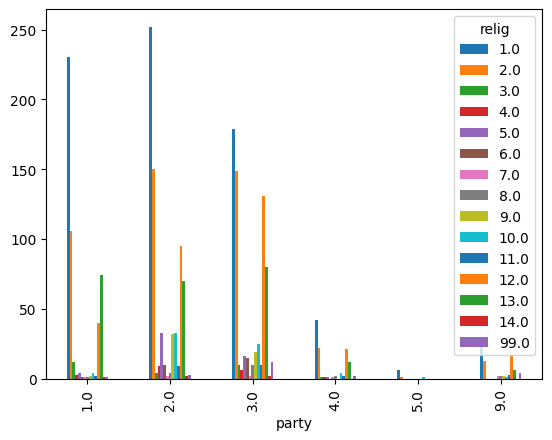

In [60]:
#Generate a barplot to depict the relationship between 'party' and 'relig'
import matplotlib
%matplotlib inline
CrosstabResult.plot.bar()

In [65]:
# import the required library to generate a contigency table
from scipy.stats import chi2_contingency

In [66]:
# Perform Chi-square test
ChiSqResult = chi2_contingency(CrosstabResult)

In [67]:
# P-Value is the Probability of H0 being True
# If P-Value >0.05 then only we Accept the assumption(H0) variables are not correlated
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.0945329350024317e-16


P-value is less than 0.05, hence religion and party are correlated

In [50]:
#Alternatively check the ChiSq between various categorical variables
## Import required libraries
import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss

In [71]:
#First split the categorical list into two parts
Survey_cat1 = ('usr', 'educ', 'party', 'lang', 'hphoneuse', 'relig')
Survey_cat2 = ('usr', 'educ', 'party', 'lang', 'hphoneuse', 'relig')


In [72]:
## Let us jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(Survey_cat1,Survey_cat2, repeat = 1))

In [73]:
# Create an empty variable and pick only the p values from the output of Chi-Square test
result = []
for i in cat_var_prod:
if i[0] != i[1]:
result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            Survey_cat[i[0]], Survey_cat[i[1]])))[1]))
result

IndentationError: expected an indented block after 'for' statement on line 3 (2972395889.py, line 4)

## 4. FEATURE ENGINEERING ##